In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,male,22.0,1,0,7.2500,S,man,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False
2,1,3,female,26.0,0,0,7.9250,S,woman,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False
4,0,3,male,35.0,0,0,8.0500,S,man,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   who       891 non-null    object 
 9   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


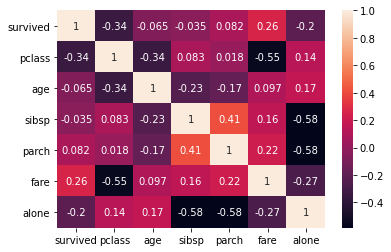

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
X = df[['pclass','fare','sex']]
y = df['survived']

In [6]:
X = pd.get_dummies(X)
X

,pclass,fare,sex_female,sex_male
0,3,7.2500,0,1
1,1,71.2833,1,0
2,3,7.9250,1,0
3,1,53.1000,1,0
4,3,8.0500,0,1
...,...,...,...,...
886,2,13.0000,0,1
887,1,30.0000,1,0
888,3,23.4500,1,0
889,1,30.0000,0,1


In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
def print_scores(actual ,pred):
    cm = confusion_matrix(actual,pred)
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    print("Overall Accuracy :  ",(tp+tn)/(tp+fp+tn+fn))
    print("Precision : ",tp/(tp+fp))
    print("Recall or TPR or Sensitivity : ",tp/(tp+fn))
    print("Specificity or TNR : ",tn/(tn+fp))

#### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(max_iter=500)

In [13]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [14]:
model.score(X_train,y_train)

0.7893258426966292

In [15]:
pred = model.predict(X_test)

In [16]:
confusion_matrix(y_test,pred)

array([[90, 16],
       [24, 49]], dtype=int64)

In [17]:
print_scores(y_test,pred)

Overall Accuracy :   0.776536312849162
Precision :  0.7538461538461538
Recall or TPR or Sensitivity :  0.6712328767123288
Specificity or TNR :  0.8490566037735849


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



#### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5)

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [22]:
model.score(X_train,y_train)

0.8300561797752809

In [23]:
pred = model.predict(X_test)
confusion_matrix(y_test,pred)

array([[103,   3],
       [ 31,  42]], dtype=int64)

In [24]:
print_scores(y_test,pred)

Overall Accuracy :   0.8100558659217877
Precision :  0.9333333333333333
Recall or TPR or Sensitivity :  0.5753424657534246
Specificity or TNR :  0.9716981132075472


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       106
           1       0.93      0.58      0.71        73

    accuracy                           0.81       179
   macro avg       0.85      0.77      0.79       179
weighted avg       0.84      0.81      0.80       179



In [26]:
from sklearn.tree import export_text

In [27]:
tree_rules = export_text(model,feature_names=list(X_train))
print(tree_rules)

|--- sex_female <= 0.50
|   |--- pclass <= 1.50
|   |   |--- fare <= 26.14
|   |   |   |--- class: 0
|   |   |--- fare >  26.14
|   |   |   |--- fare <= 30.60
|   |   |   |   |--- fare <= 29.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  29.85
|   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  30.60
|   |   |   |   |--- fare <= 79.02
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  79.02
|   |   |   |   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- fare <= 7.91
|   |   |   |--- fare <= 7.24
|   |   |   |   |--- fare <= 7.13
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  7.13
|   |   |   |   |   |--- class: 0
|   |   |   |--- fare >  7.24
|   |   |   |   |--- fare <= 7.79
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  7.79
|   |   |   |   |   |--- class: 0
|   |   |--- fare >  7.91
|   |   |   |--- fare <= 7.99
|   |   |   |   |--- class: 0
|   |   |   |--- fare >  7.99
|   |   |   |   |--- fare <= 63.02
|

#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
randf = RandomForestClassifier()

In [30]:
randf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
randf.score(X_train,y_train)

0.9073033707865169

In [32]:
pred = randf.predict(X_test)

In [33]:
print_scores(y_test,pred)

Overall Accuracy :   0.8435754189944135
Precision :  0.9090909090909091
Recall or TPR or Sensitivity :  0.684931506849315
Specificity or TNR :  0.9528301886792453


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       106
           1       0.91      0.68      0.78        73

    accuracy                           0.84       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



#### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model = KNeighborsClassifier(n_neighbors=5)

In [37]:
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.824438202247191

In [38]:
pred = model.predict(X_test)

In [39]:
print_scores(y_test,pred)

Overall Accuracy :   0.8268156424581006
Precision :  0.8181818181818182
Recall or TPR or Sensitivity :  0.7397260273972602
Specificity or TNR :  0.8867924528301887


In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       106
           1       0.82      0.74      0.78        73

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



#### Niave Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [43]:
model.score(X_train,y_train)

0.7823033707865169

In [44]:
pred = model.predict(X_test)

In [45]:
print_scores(y_test,pred)

Overall Accuracy :   0.776536312849162
Precision :  0.746268656716418
Recall or TPR or Sensitivity :  0.684931506849315
Specificity or TNR :  0.839622641509434


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       106
           1       0.75      0.68      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.77      0.78      0.77       179



#### SVM

In [47]:
from sklearn.svm import SVC

In [48]:
model= SVC()
model.fit(X_train,y_train)

SVC()

In [49]:
model.score(X_train,y_train)

0.6839887640449438

In [50]:
pred = model.predict(X_test)

In [51]:
print_scores(y_test,pred)

Overall Accuracy :   0.6089385474860335
Precision :  0.5714285714285714
Recall or TPR or Sensitivity :  0.1643835616438356
Specificity or TNR :  0.9150943396226415


In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.92      0.73       106
           1       0.57      0.16      0.26        73

    accuracy                           0.61       179
   macro avg       0.59      0.54      0.50       179
weighted avg       0.60      0.61      0.54       179



#### Random Forest has accuracy of 84.4% which is maximum of all the models used. 
#### So the best model is Random Forest.

In [53]:
import pickle

In [54]:
pickle.dump(randf,open('model.pkl','wb'))